In [50]:
import tensorflow

In [51]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

# 3D-Tenosr mit 60000 Samples, jeweilige Größe von 28x28 Pixel
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

5

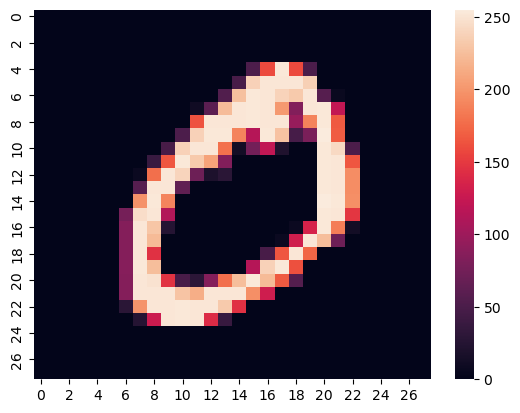

In [52]:
import seaborn as sns
sns.heatmap(x_train[1])
y_train[0]

In [53]:
import pandas as pd

# für Clf müssen matrix-förmige Bilddaten vektorisiert werden
x_train_df = pd.DataFrame(x_train.reshape(60000, 28*28))
# x_train_df = pd.DataFrame(x_train.reshape(x_train.shape[0], x_train.shape[1] *  x_train.shape[2]))
# x_train.reshape(60000, -1)
# x_train.reshape(x_train.shape[0], -1)

x_train_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
pd.Series(y_train).describe()

count    60000.000000
mean         4.453933
std          2.889270
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
dtype: float64

In [55]:
x_train[0].shape

(28, 28)

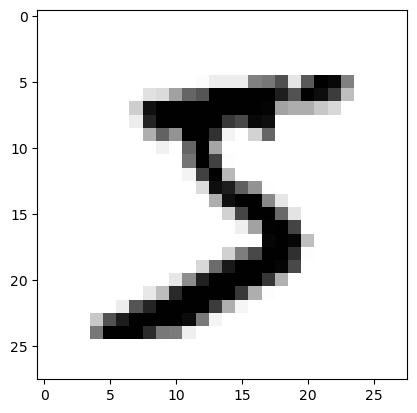

In [56]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray_r")

# Sequential

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(784,)))
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc"])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                50240     
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [79]:
# x_trainrReshapen
x_train = x_train.reshape(60000, 784)

# y_train reshapen, damit verglichen werden kann
# z.B.: [ 5 ]           -> shape: (1,)
#       [ 0000010000 ]  -> shape: (10,)

# https://keras.io/api/utils/python_utils/#to_categorical-function
# Erstellt uns in Abhängigkeit von 'num_classes' (= Anzahl der Klassen, die es im Dataset gibt => siehe alle unique 
# Antworten in y_train) einen Vektor, bei welchem jede Stelle '1' ist, die die gewünscht Ziffer (0, 1, 2, ...) repräsentiert.

from tensorflow.keras import utils
if(y_test.shape != (y_test.shape[0], 10)):
    y_train = utils.to_categorical(y_train, 10)

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [80]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 5.7547 - acc: 0.8445
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.6743 - acc: 0.8892
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4142 - acc: 0.9208
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3224 - acc: 0.9384
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2572 - acc: 0.9478


In [81]:
x_test = x_test.reshape(x_test.shape[0], -1)

y_pred = model.predict(x_test)

import numpy as np
y_pred = np.round(y_pred, 0)

if(y_test.shape == (y_test.shape[0], 10)):
    y_pred = np.argmax(y_pred, axis=1)

y_pred[0]

313/313 [==============================] - 1s 3ms/step


7

In [82]:
x_test = x_test.reshape(x_test.shape[0], -1)
from tensorflow.keras import utils
if(y_test.shape != (y_test.shape[0], 10)):
    y_test = utils.to_categorical(y_test, 10)

print(x_test.shape)
print(y_test.shape)

model.evaluate(x_test, y_test) 

(10000, 784)
(10000, 10)
313/313 [==============================] - 1s 3ms/step - loss: 0.4119 - acc: 0.9382


[0.41194936633110046, 0.9381999969482422]